<a href="https://colab.research.google.com/github/LAMQADDEM-LAMYAA/PFE/blob/main/PFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Heat of vaporization**

In [ ]:
! pip install thermo
from thermo import Chemical
substance = Chemical('water')

# Température en Kelvin
temperature = 364  # Température en Kelvin

# Calcul de la chaleur latente de vaporisation à la température donnée (en J/mol)
heat_of_vaporization_J_per_mol = substance.EnthalpyVaporization(temperature)

# Masse molaire de l'eau en g/mol
molar_mass_water = 18.01528

# Conversion de J/mol en kJ/kg
heat_of_vaporization_kJ_per_kg = heat_of_vaporization_J_per_mol / molar_mass_water

print("La chaleur latente de vaporisation à", temperature, "K est de", heat_of_vaporization_kJ_per_kg, "kJ/kg")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.2 MB/s eta 0:00:00
La chaleur latente de vaporisation à 364 K est de 2280.2954853528754 kJ/kg


# **Bootstrapping preliming FK and pH, Alkalinity**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Original data
data = {
    'FK': [0.95, 1.54, 1.06, 1.06, 0.86, 0.91, 0.79, 0.76, 0.84, 0.69,
           0.71, 0.76, 0.73, 0.76, 1.09, 0.41, 0.89, 0.84, 0.87, 0.88,
           0.93, 0.84, 0.80, 0.82, 0.88, 0.94, 0.98, 0.84, 0.68],
    'ph': [11.59, 11.58, 11.58, 11.58, 11.58, 11.48, 11.64, 11.55, 11.59, 11.62,
           11.55, 11.51, 11.53, 11.56, 11.59, 11.62, 11.57, 11.53, 11.50, 11.49,
           11.50, 11.49, 11.53, 11.50, 11.49, 11.49, 11.53, 11.54, 11.20],
    'alc': [2.72, 2.71, 2.70, 2.79, 2.95, 2.95, 3.00, 2.75, 2.84, 2.95,
            2.85, 2.83, 2.78, 2.96, 2.96, 2.84, 2.89, 2.89, 5.40, 2.97,
            2.93, 2.82, 5.13, 2.90, 2.97, 2.95, 3.12, 3.02, 2.37]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define models
models = {
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "Neural Network": MLPRegressor()
}

# Number of bootstrap samples
n_samples = 100
results = {model: {"MSE": [], "R2": []} for model in models}

# Generate bootstrap samples, train models, and evaluate
for i in range(n_samples):
    # Generate bootstrap sample
    bootstrap_df = df.sample(frac=1, replace=True)
    X = bootstrap_df[['ph', 'alc']]
    y = bootstrap_df['FK']

    # Evaluate each model
    for model_name, model in models.items():
        mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        results[model_name]["MSE"].extend(mse_scores)
        results[model_name]["R2"].extend(r2_scores)

# Calculate average scores
avg_results = {model: {"MSE": np.mean(scores["MSE"]), "R2": np.mean(scores["R2"])} for model, scores in results.items()}

# Print average results
for model, scores in avg_results.items():
    print(f"{model}:\n  MSE: {scores['MSE']}\n  R^2: {scores['R2']}\n")

# Now, let's use the Random Forest model to make predictions
# First, train the model on the entire dataset
rf_model = RandomForestRegressor()
X_train = df[['ph', 'alc']]
y_train = df['FK']
rf_model.fit(X_train, y_train)

# Now, let's predict for a new data point
# For example, if you have a new data point x_new = [ph_new, alc_new]
ph_new = 11.52
alc_new = 2.85
x_new = [[ph_new, alc_new]]

# Predict using the trained model
y_new = rf_model.predict(x_new)
print(f"Prediction for input {x_new}: {y_new}")

Random Forest:
  MSE: 0.021280431463333385
  R^2: -0.3765028226836767

Support Vector Machine:
  MSE: 0.0362626686304849
  R^2: -0.4823713076726782

Neural Network:
  MSE: 0.13001128875002574
  R^2: -9.824014567322376

Prediction for input [[11.52, 2.85]]: [0.7575]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# **Test de Kolmogorov-Smirnov 2nd cab alkalinity**

Random Forest:
  MSE: 0.021041082000000003
  R^2: -0.3187772246603331

Support Vector Machine:
  MSE: 0.03384551380970847
  R^2: -0.34271721814277634

Neural Network:
  MSE: 0.06465561209804373
  R^2: -4.854179823241079



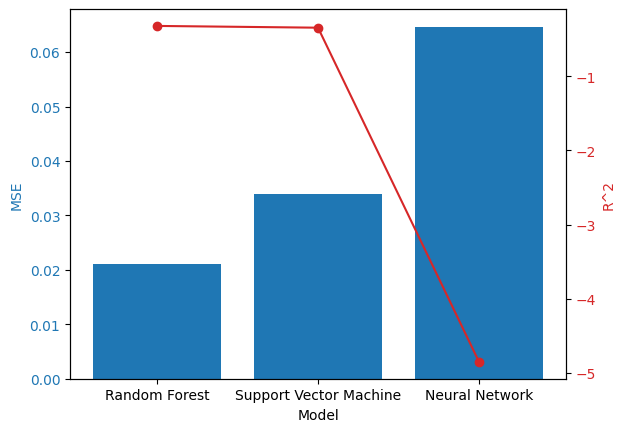

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.751])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Original data
data = {
    'FK': [0.95, 1.54, 1.06, 1.06, 0.86, 0.91, 0.79, 0.76, 0.84, 0.69,
           0.71, 0.76, 0.73, 0.76, 1.09, 0.41, 0.89, 0.84, 0.87, 0.88,
           0.93, 0.84, 0.80, 0.82, 0.88, 0.94, 0.98, 0.84, 0.68],
    'ph': [11.59, 11.58, 11.58, 11.58, 11.58, 11.48, 11.64, 11.55, 11.59, 11.62,
           11.55, 11.51, 11.53, 11.56, 11.59, 11.62, 11.57, 11.53, 11.50, 11.49,
           11.50, 11.49, 11.53, 11.50, 11.49, 11.49, 11.53, 11.54, 11.20],
    'alc': [2.72, 2.71, 2.70, 2.79, 2.95, 2.95, 3.00, 2.75, 2.84, 2.95,
            2.85, 2.83, 2.78, 2.96, 2.96, 2.84, 2.89, 2.89, 5.40, 2.97,
            2.93, 2.82, 5.13, 2.90, 2.97, 2.95, 3.12, 3.02, 2.37]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=10, random_state=0),
    "Support Vector Machine": SVR(),
    "Neural Network": MLPRegressor(max_iter=500, random_state=0)
}

# Number of bootstrap samples (reduced)
n_samples = 10
results = {model: {"MSE": [], "R2": []} for model in models}

# Generate bootstrap samples, train models, and evaluate
for i in range(n_samples):
    # Generate bootstrap sample
    bootstrap_df = df.sample(frac=1, replace=True, random_state=i)
    X = bootstrap_df[['ph', 'alc']]
    y = bootstrap_df['FK']

    # Evaluate each model
    for model_name, model in models.items():
        mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        results[model_name]["MSE"].extend(mse_scores)
        results[model_name]["R2"].extend(r2_scores)

# Calculate average scores
avg_results = {model: {"MSE": np.mean(scores["MSE"]), "R2": np.mean(scores["R2"])} for model, scores in results.items()}

# Print average results
for model, scores in avg_results.items():
    print(f"{model}:\n  MSE: {scores['MSE']}\n  R^2: {scores['R2']}\n")

# Visualize the results
models_list = list(models.keys())
mse_values = [avg_results[model]["MSE"] for model in models_list]
r2_values = [avg_results[model]["R2"] for model in models_list]

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('MSE', color=color)
ax1.bar(models_list, mse_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('R^2', color=color)
ax2.plot(models_list, r2_values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)
plt.show()

# Train the Random Forest model on the entire dataset
rf_model = RandomForestRegressor(n_estimators=10, random_state=0)
X_train = df[['ph', 'alc']]
y_train = df['FK']
rf_model.fit(X_train, y_train)

# Predict for a new data point
ph_new = 11.52
alc_new = 2.85
x_new = [[ph_new, alc_new]]

# Predict using the trained model
y_new = rf_model.predict(x_new)
y_new


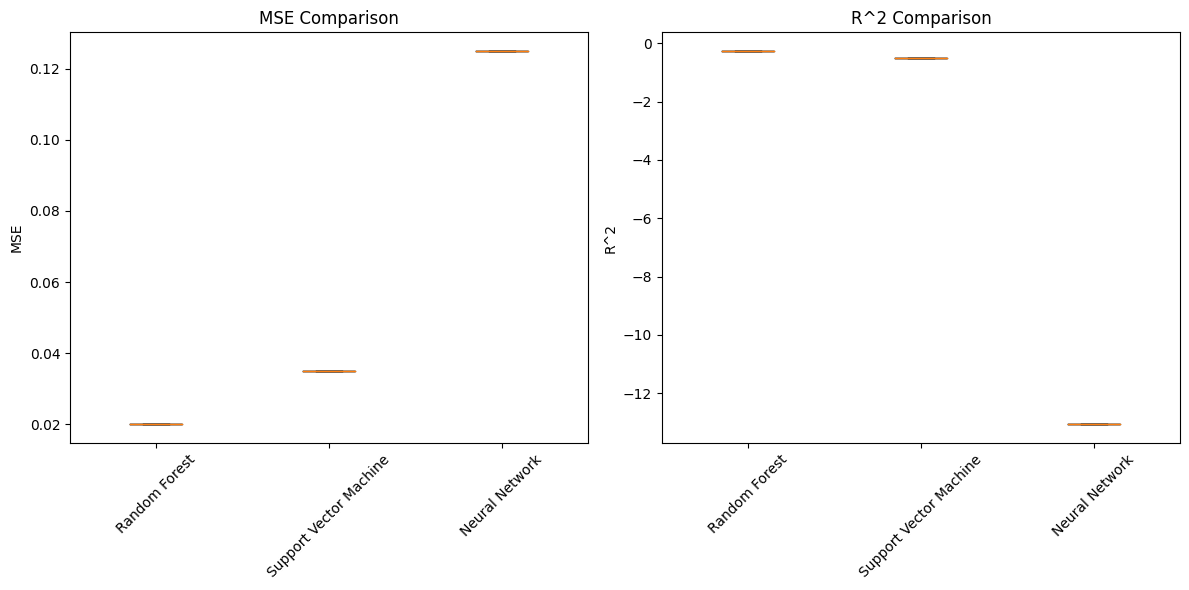

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data for MSE and R^2 values for each model
models = ['Random Forest', 'Support Vector Machine', 'Neural Network']
mse_values = [[0.020], [0.035], [0.125]]  # List of lists, each containing MSE value for one model
r2_values = [[-0.266], [-0.491], [-13.067]]  # List of lists, each containing R^2 value for one model

# Create separate box plots for MSE and R^2
plt.figure(figsize=(12, 6))

# Box plot for MSE
plt.subplot(1, 2, 1)
plt.boxplot(mse_values, labels=models)
plt.title('MSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('MSE')

# Box plot for R^2
plt.subplot(1, 2, 2)
plt.boxplot(r2_values, labels=models)
plt.title('R^2 Comparison')
plt.xticks(rotation=45)
plt.ylabel('R^2')

plt.tight_layout()
plt.show()



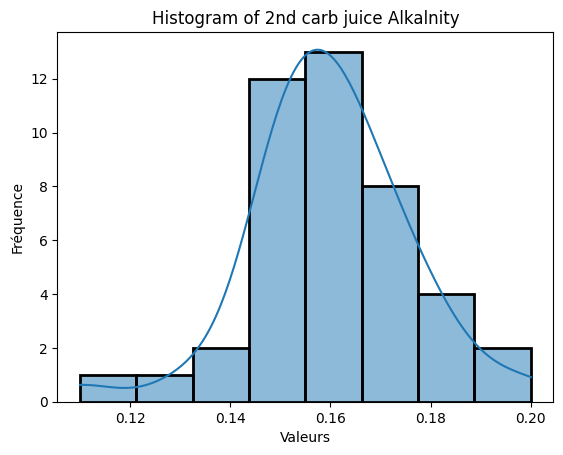

Test of Kolmogorov-Smirnov: Statistic =0.17094184232092902, p-value=0.14395498293535913
The data follows a normal distribution.


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
data = [
    0.14, 0.16, 0.15, 0.13, 0.15, 0.15, 0.14, 0.18, 0.20, 0.17,
    0.19, 0.17, 0.16, 0.17, 0.16, 0.16, 0.15, 0.16, 0.17, 0.18,
    0.15, 0.15, 0.15, 0.15, 0.15, 0.16, 0.15, 0.17, 0.17, 0.16,
    0.16, 0.17, 0.18, 0.18, 0.17, 0.16, 0.16, 0.16, 0.15, 0.15,
    0.16, 0.16, 0.11
]

# Histogram with density curve
sns.histplot(data, kde=True,linewidth=2)
plt.title('Histogram of 2nd carb juice Alkalnity')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.show()

# Test de Kolmogorov-Smirnov
ks_test = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))

# Display test results
print(f'Test of Kolmogorov-Smirnov: Statistic ={ks_test.statistic}, p-value={ks_test.pvalue}')

# Checking for normality based on the p-value
alpha = 0.05
if ks_test.pvalue > alpha:
    print("The data follows a normal distribution.")
else:
    print("The data does not follow a normal distribution.")


# ***Test de Kolmogorov-Smirnov pH 1st carb ***

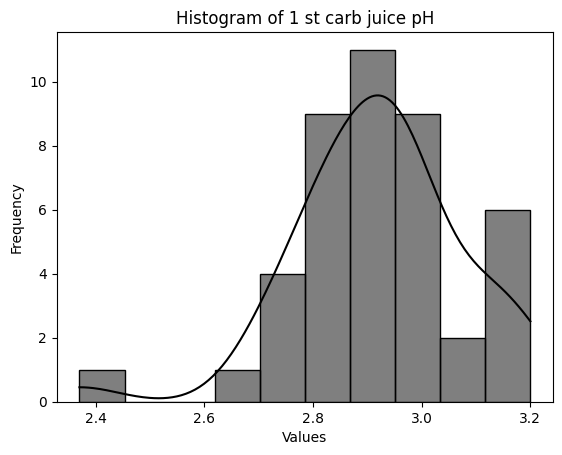

 Kolmogorov-Smirnov Test : Statistic =0.14693958997941714, p-value=0.29496774880401033
The data follows a normal distribution.


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
data_ph = [
    11.16, 11.14, 11.08, 11.06, 11.00, 10.98, 10.93, 11.02, 10.98, 11.00,
    11.08, 11.00, 11.03, 10.97, 10.99, 10.93, 10.94, 11.02, 11.03, 10.98,
    11.04, 11.00, 11.00, 10.98, 11.03, 11.00, 11.03, 11.00, 11.01,
    10.98, 10.94, 10.95, 10.96, 10.97, 10.97, 10.95, 10.93, 10.95, 10.97,
    10.95, 11.00, 10.80
]

# Histogram with density curve
sns.histplot(data, kde=True, color='black', linewidth=1)
plt.title('Histogram of 1 st carb juice pH')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Test of Kolmogorov-Smirnov
ks_test_ph = stats.kstest(data_ph, 'norm', args=(np.mean(data_ph), np.std(data_ph)))

# Display test results
print(f' Kolmogorov-Smirnov Test : Statistic ={ks_test_ph.statistic}, p-value={ks_test_ph.pvalue}')

# Checking for normality based on the p-value
alpha = 0.05
if ks_test_ph.pvalue > alpha:
    print("The data follows a normal distribution.")
else:
    print("The data does not follow a normal distribution.")


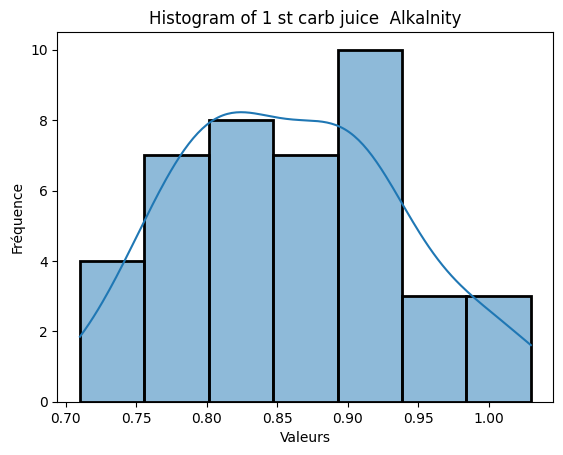

Test of Kolmogorov-Smirnov: Statistic =0.10602992847329001, p-value=0.6928933265610936
The data follows a normal distribution.


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
data = [
      1.03 ,0.99, 0.91, 0.90,  0.80, 0.75, 0.83, 0.83, 0.79,
    0.82, 0.75, 0.78, 0.78, 0.79, 0.75, 0.71, 0.87, 1.01, 0.97,
    0.98, 0.88, 0.78, 0.82, 0.83, 0.90, 0.85, 0.82, 0.812, 0.81,
    0.85, 0.87, 0.92, 0.91, 0.95, 0.91, 0.86, 0.88, 0.93, 0.92,
    0.91, 0.90, 0.77
]

# Histogram with density curve
sns.histplot(data, kde=True,linewidth=2)
plt.title('Histogram of 1 st carb juice  Alkalnity')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.show()

# Test de Kolmogorov-Smirnov
ks_test = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))

# Display test results
print(f'Test of Kolmogorov-Smirnov: Statistic ={ks_test.statistic}, p-value={ks_test.pvalue}')

# Checking for normality based on the p-value
alpha = 0.05
if ks_test.pvalue > alpha:
    print("The data follows a normal distribution.")
else:
    print("The data does not follow a normal distribution.")

# **Kolmogorov-Smirnov test check for normality of Prelimed juice**

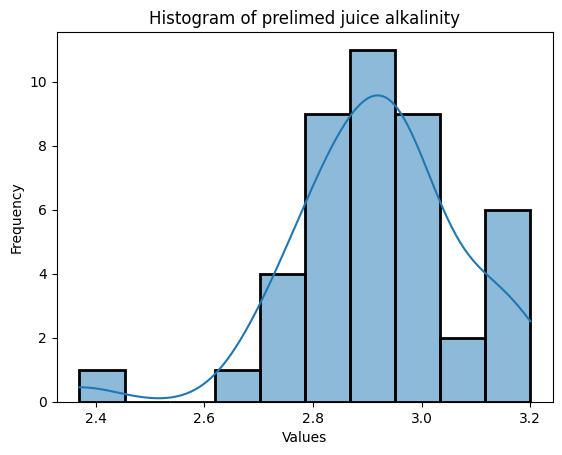

Kolmogorov-Smirnov Test Result: Statistic =0.09392087845935382, p-value=0.8086773088838042
The data follows a normal distribution.


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
data = [
    2.93, 3.20, 3.20, 3.16, 3.15, 2.99, 2.97, 3.09, 2.85, 3.00, 3.12, 2.83, 3.09, 2.80,
    2.89, 2.89, 2.72, 2.71, 2.70, 2.79, 2.95, 2.95, 3.00, 2.75, 2.84, 2.95, 2.85, 2.83,
    2.78, 2.96, 2.96, 2.84, 2.89, 2.89, 2.97, 2.93, 2.82, 2.90, 2.97, 2.95,
    3.12, 3.02, 2.37
]

# Histogram with density curve
sns.histplot(data, kde=True, linewidth=2)
plt.title('Histogram of prelimed juice alkalinity')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Kolmogorov-Smirnov Test
ks_test_result = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))

# Display test results
print(f'Kolmogorov-Smirnov Test Result: Statistic ={ks_test_result.statistic}, p-value={ks_test_result.pvalue}')

# Checking for normality based on the p-value
alpha = 0.05
if ks_test_result.pvalue > alpha:
    print("The data follows a normal distribution.")
else:
    print("The data does not follow a normal distribution.")


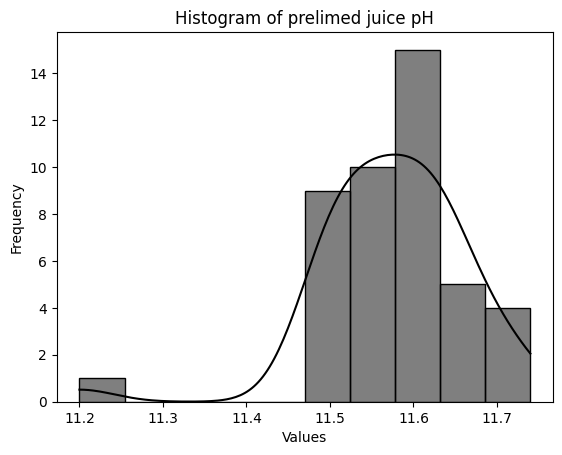

Kolmogorov-Smirnov Test Result: Statistic =0.12149753843859519, p-value=0.49653776326319576
The data follows a normal distribution.


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
data = [
    11.55, 11.66, 11.71, 11.71, 11.62, 11.63, 11.69, 11.64, 11.74, 11.68, 11.65, 11.63, 11.63,
    11.63, 11.63, 11.59, 11.58, 11.58, 11.58, 11.58, 11.48, 11.64, 11.55, 11.59, 11.62, 11.55,
    11.51, 11.53, 11.56, 11.59, 11.62, 11.57, 11.53, 11.50, 11.49, 11.50, 11.49, 11.53, 11.50,
    11.49, 11.49, 11.53, 11.54, 11.20
]

# Histogram with density curve
sns.histplot(data, kde=True, color='black',linewidth=1)
plt.title('Histogram of prelimed juice pH')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Kolmogorov-Smirnov Test
ks_test_result = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))

# Display test results
print(f'Kolmogorov-Smirnov Test Result: Statistic ={ks_test_result.statistic}, p-value={ks_test_result.pvalue}')

# Checking for normality based on the p-value
alpha = 0.05
if ks_test_result.pvalue > alpha:
    print("The data follows a normal distribution.")
else:
    print("The data does not follow a normal distribution.")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


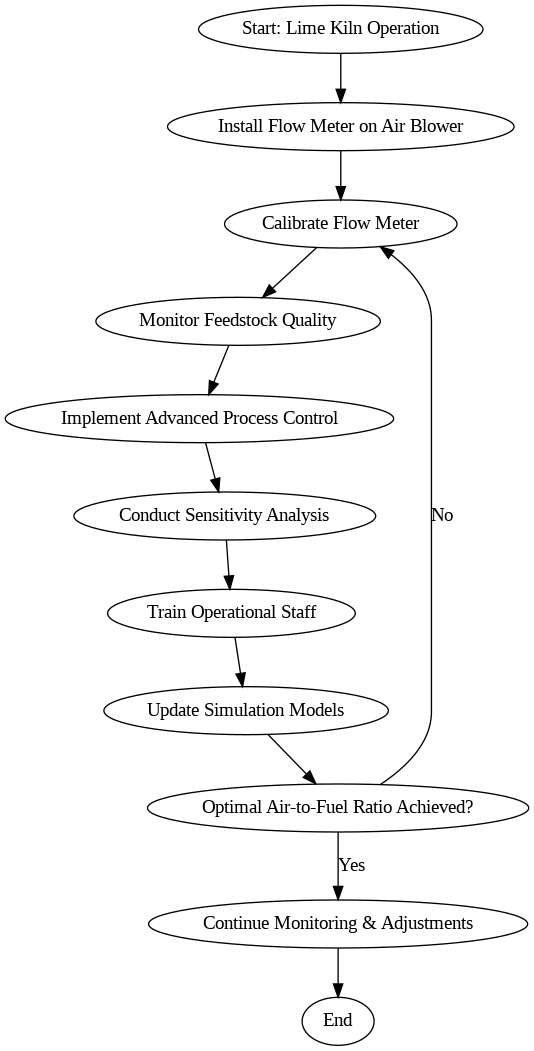

In [ ]:
# Step 1: Install Graphviz and the Python graphviz library
!apt-get install graphviz
!pip install graphviz

# Step 2: Generate the pilotage logigram
import graphviz

# Define the logigram
logigram = graphviz.Digraph(comment='Lime Kiln Operation Improvement Plan')

# Add nodes
logigram.node('A', 'Start: Lime Kiln Operation')
logigram.node('B', 'Install Flow Meter on Air Blower')
logigram.node('C', 'Calibrate Flow Meter')
logigram.node('D', 'Monitor Feedstock Quality')
logigram.node('E', 'Implement Advanced Process Control')
logigram.node('F', 'Conduct Sensitivity Analysis')
logigram.node('G', 'Train Operational Staff')
logigram.node('H', 'Update Simulation Models')
logigram.node('I', 'Optimal Air-to-Fuel Ratio Achieved?')
logigram.node('J', 'Continue Monitoring & Adjustments')
logigram.node('K', 'End')

# Add edges
logigram.edge('A', 'B')
logigram.edge('B', 'C')
logigram.edge('C', 'D')
logigram.edge('D', 'E')
logigram.edge('E', 'F')
logigram.edge('F', 'G')
logigram.edge('G', 'H')
logigram.edge('H', 'I')
logigram.edge('I', 'J', label='Yes')
logigram.edge('I', 'C', label='No')
logigram.edge('J', 'K')

# Render the logigram to a file and display it
logigram.render('/content/lime_kiln_pilotage_logigram', format='png', view=False)

from IPython.display import Image
Image('/content/lime_kiln_pilotage_logigram.png')
